In [10]:
#import all important libraries
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns


from warnings import filterwarnings
filterwarnings(action='ignore')

# Loading Dataset

In [11]:
data = pd.read_csv("weight-height.csv")
data.sample(25)

,Gender,Height,Weight
1998,Male,69.667115,192.558899
238,Male,74.104559,215.759704
7349,Female,59.515890,124.889618
4690,Male,69.841667,188.512233
8928,Female,66.868688,157.717527
2416,Male,75.146908,221.329228
2442,Male,68.964367,181.537670
490,Male,68.792984,174.489486
4830,Male,70.798271,198.388001
2776,Male,71.223423,194.941407


In [12]:
# make the copy of the data to perform operation
df_copy = data.copy()
df_copy

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [13]:
#information about the data
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [14]:
#detailes about the data
df_copy.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


# Finding Null Values¶

In [15]:
df_copy.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

There are no null values..

In [16]:
#cheacking unique values in the Height column
df_copy["Height"].unique()

array([73.84701702, 68.78190405, 74.11010539, ..., 63.86799221,
       69.03424313, 61.94424588])

# Data Analysis of the data

<Axes: ylabel='Height'>

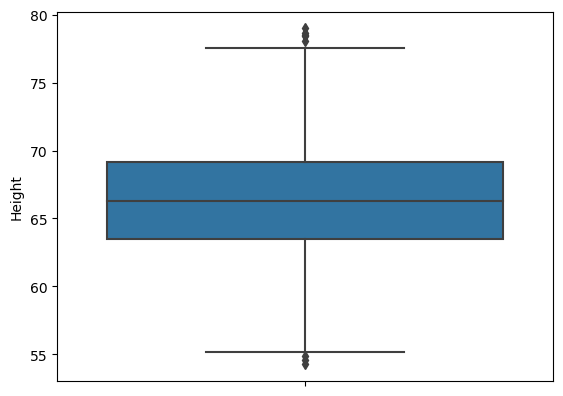

In [17]:
#cheacking the outliers in "Height" column by plotting box plot
sns.boxplot(df_copy,y = df_copy["Height"])

There are some outliers both the up and down sides

<Axes: >

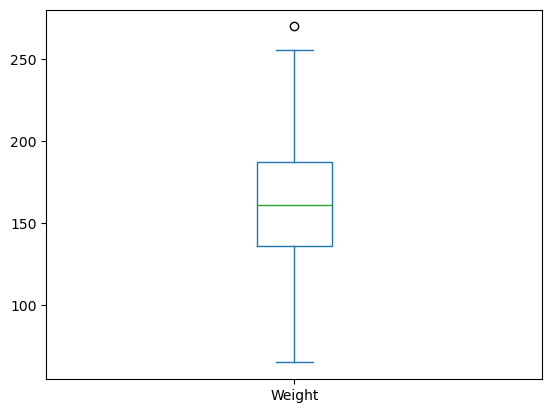

In [21]:
#cheacking the outliers in "Weight" column by plotting box plot
df_copy["Weight"].plot(kind ='box')

There is only one outlier in the "Height" column

In [22]:
#count the values in the "Gender" column
df_copy["Gender"].value_counts()

Gender
Male      5000
Female    5000
Name: count, dtype: int64

There are five thousand males and five thousands females in the "Gender" column

# Outlier Removal

In [24]:
#describe the "Height" column
df_copy["Height"].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [26]:
#calculate IQR for outlier removel
percentile25 = df_copy['Height'].quantile(0.25)
percentile75 = df_copy['Height'].quantile(0.75)
IQR = percentile75 -percentile25

In [27]:
IQR

5.668641245615746

In [28]:
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

In [30]:
df_copy = df_copy[(df_copy['Height'] <=upper_limit) & (df_copy['Height'] >=lower_limit)]

In [32]:
df_copy

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<Axes: >

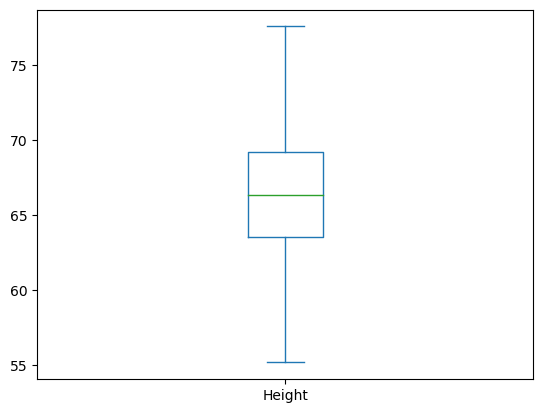

In [34]:
#cheack the outlier removed or not in "Height" column
df_copy["Height"].plot(kind = "box")

There are sucessfully outliers removed

<Axes: >

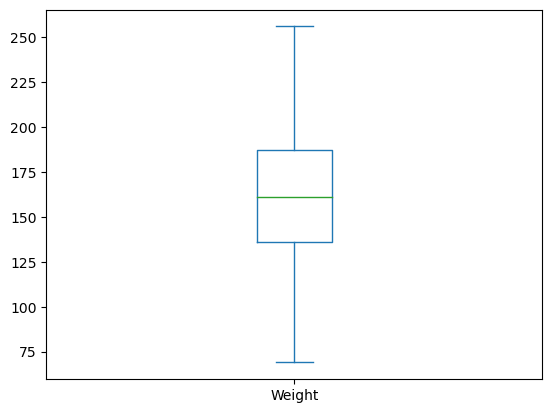

In [35]:
#cheack the outlier removed or not in "Weight" column
df_copy["Weight"].plot(kind ='box')

Thus outliers removed

In [36]:
df_copy.shape

(9992, 3)

<Axes: >

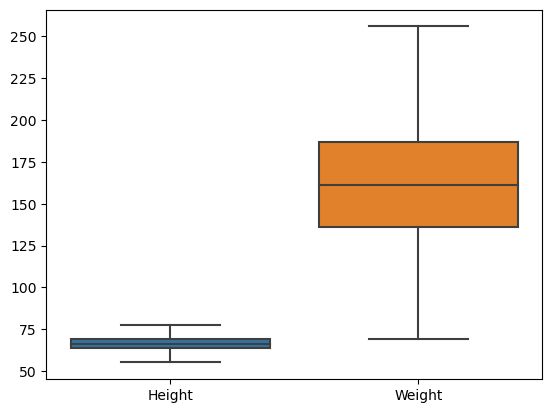

In [37]:
sns.boxplot(data =df_copy[["Height","Weight"]])

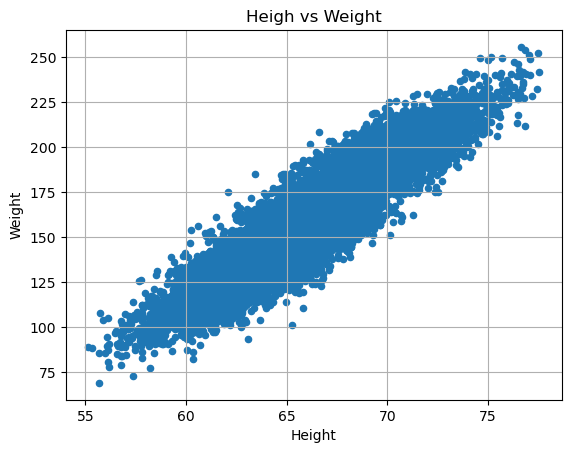

In [38]:
df_copy.plot.scatter(x="Height",y="Weight")
plt.title("Heigh vs Weight")
plt.grid()
plt.show()

# Feature Enginnering

Thus here we have to add new column BMI for critical analysis

The formula for BMI is weight in kilograms divided by height in meter square..

In [40]:
df_copy.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


as we dont know height weight unit so assuming it as kg and meter thus roughly caculating BMI

In [41]:
df_copy["BMI Calculate"]= ((df_copy["Weight"]/(df_copy["Height"]*df_copy["Height"]))*100)

In [42]:
df_copy

,Gender,Height,Weight,BMI Calculate
0,Male,73.847017,241.893563,4.435662
1,Male,68.781904,162.310473,3.430822
2,Male,74.110105,212.740856,3.873433
3,Male,71.730978,220.042470,4.276545
4,Male,69.881796,206.349801,4.225479
...,...,...,...,...
9995,Female,66.172652,136.777454,3.123615
9996,Female,67.067155,170.867906,3.798750
9997,Female,63.867992,128.475319,3.149584
9998,Female,69.034243,163.852461,3.438142


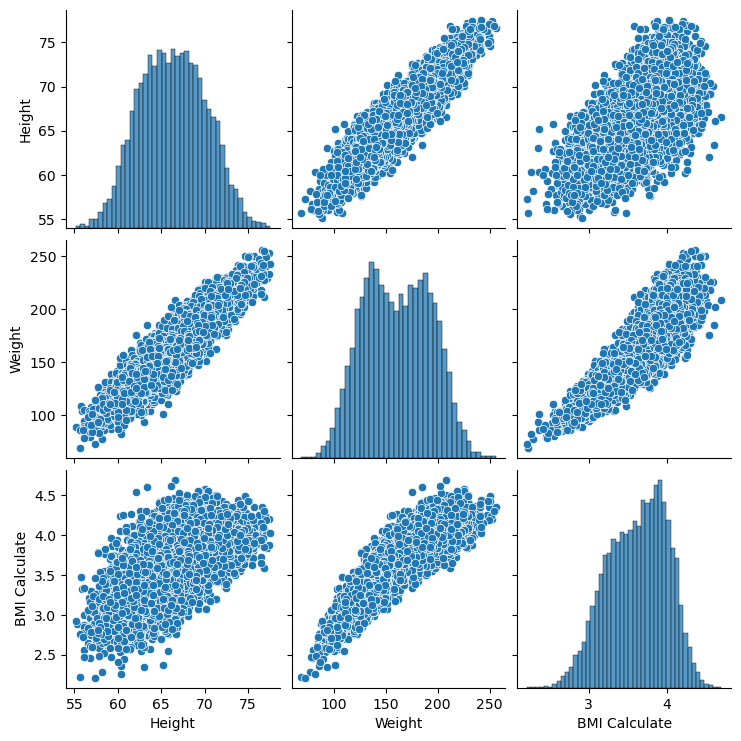

In [43]:
sns.pairplot(df_copy)

In [44]:
df_copy["BMI Calculate"].describe()

count    9992.000000
mean        3.623613
std         0.382550
min         2.211669
25%         3.337560
50%         3.660120
75%         3.919643
max         4.697704
Name: BMI Calculate, dtype: float64

# Encoding

Convert Gender to number: Convert all categorical values (text values) to numerical, in this case convert gender variable to O
for male and 1 for female. LabelEncoder is used for this purpose..

In [47]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df_copy['Gender']= label_encoder.fit_transform(df_copy['Gender']) 

df_copy['Gender'].unique() 

array([1, 0])

In [48]:
df_copy

,Gender,Height,Weight,BMI Calculate
0,1,73.847017,241.893563,4.435662
1,1,68.781904,162.310473,3.430822
2,1,74.110105,212.740856,3.873433
3,1,71.730978,220.042470,4.276545
4,1,69.881796,206.349801,4.225479
...,...,...,...,...
9995,0,66.172652,136.777454,3.123615
9996,0,67.067155,170.867906,3.798750
9997,0,63.867992,128.475319,3.149584
9998,0,69.034243,163.852461,3.438142


In [49]:
df_copy["Gender"].value_counts()

Gender
0    4997
1    4995
Name: count, dtype: int64